# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가을 위한 대용량 데이터셋을 제공(feeding)하기 위한 모듈
    - raw dataset 에서 입력을 위한 전처리, 제공을 위한 배치, shuffling등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태에 따라 다양한 방식을 제공


## 데이터셋 API 사용
1. <span style='font-size:1.2em;font-weight:bolder'>Dataset 생성</span>
    - raw dataset을 지정
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. <span style='font-size:1.2em;font-weight:bolder'>제공 데이터 전처리</span>
    - map(함수) : 하나 하나의 데이터를 변환
        - 함수: 값을 변환할 함수로 입력데이터셋의 개수만큼 매개변수 선언
    - filter(함수): 특정 조건의 데이터만 제공하도록 처리.
        - - 함수: 제공할 값의 조건을 정의한 함수로 입력데이터셋의 개수만큼 매개변수 선언하고 bool 값을 반환.
3. <span style='font-size:1.2em;font-weight:bolder'>Dataset을 사용해 데이터 제공</span>
    - batch(), shuffle()을 이용해 제공 방식 지정
        - batch(size): 학습/평가시 한번에 제공할 batch size 지정
            - size: int. batch size 지정
            - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    -  shuffle(buffer 크기): dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
    - repeat(count): 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다.
        
### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.


In [1]:
import tensorflow as tf
import numpy as np

In [3]:
raw_data = np.arange(10) 
raw_data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
dataset = tf.data.Dataset.from_tensor_slices(raw_data)
print(type(dataset))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [5]:
# Dataset으로 부터 값 조회
# take()함수사용-원하는 개수만큼, 반복문 (Dataset=>Iterable타입)-전체조회
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [24]:
raw_data2 = np.arange(10,20)
raw_data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [25]:
# 학습- model.fit(X, y)
# raw_data: X_train, raw_data2: y_train
dataset2 = tf.data.Dataset.from_tensor_slices((raw_data, raw_data2)) 
for X, y in dataset2:
    print(X, y)
#     print(type(data))
#     print(data)
    

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) tf.Tensor(19, shape=(), dtype=int32)


In [8]:
print(raw_data)
print(raw_data2)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]


In [6]:
# dataset.take(개수): 지정한 개수만큼만 조회
dataset3 = dataset.take(3) #dataset으로 부터 3개
print(type(dataset3))
for data in dataset3:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [7]:
# dataset.shuffle(buffer_size:정수) : dataset의 원소들을 섞어준다. buffer_size는 메모리가 허용하는 한 raw_data와 같은 개수로 지정.
dataset4 = dataset.shuffle(10) 
print(type(dataset4))
for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [76]:
# dataset.batch(batch_size): 한번에 제공하는 데이터의 개수
# dataset5 = dataset.batch(3)  # 한번에 3개씩 제공
dataset5 = dataset.batch(3, drop_remainder=True)
print(type(dataset5))
for data in dataset5:
    print(data)
    

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)


In [9]:
# 기본 dataset + shuffle + batch 
# a = dataset.shuffle(10)
# b = a.batch(3)
dataset = tf.data.Dataset.from_tensor_slices(raw_data)

dataset6 = dataset.shuffle(10).batch(3)
for d in dataset6:
    print(d)

tf.Tensor([7 0 5], shape=(3,), dtype=int32)
tf.Tensor([8 6 9], shape=(3,), dtype=int32)
tf.Tensor([1 3 2], shape=(3,), dtype=int32)
tf.Tensor([4], shape=(1,), dtype=int32)


In [12]:
# dataset.repeat(count) # 전체 데이터셋을 count 만큼 반복해서 제공, count 생략하면 무한제공
dataset7 = dataset.repeat(2) #3번 반복해서 제공
print(type(dataset7))
for data in dataset7:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [13]:
# 여러번 반복해서(repeat) 값을 제공할 경우 반복을 시작할 때 마다 shuffle을 한다.
dataset8 = dataset.shuffle(10).batch(5).repeat(3)
for data in dataset8:
    print(data)

tf.Tensor([5 9 8 0 2], shape=(5,), dtype=int32)
tf.Tensor([3 6 4 1 7], shape=(5,), dtype=int32)
tf.Tensor([8 0 7 1 3], shape=(5,), dtype=int32)
tf.Tensor([4 5 2 6 9], shape=(5,), dtype=int32)
tf.Tensor([8 3 2 1 9], shape=(5,), dtype=int32)
tf.Tensor([6 5 0 4 7], shape=(5,), dtype=int32)


In [19]:
# dataset.map(함수): 원소들의 값을 변환해서 제공. 
# 함수: 어떻게 변환할지 - 매개변수: dataset이 제공하는 값을 받는 변수(dataset의 배열개수만큼 지정), 반환값: dataset이 제공하는 값
# 값들을 제곱해서 변환
# mapping함수 - 입력데이터(argument)와 출력데이터(return)의 타입이 동일해야 한다.
def mapping_func(x):
    return x**2
#     return x/255.

dataset9 = dataset.map(mapping_func)
print(type(dataset9))
for data in dataset9:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [32]:
def mapping_func2(x, y):#x: raw_data, y: raw_data2
    
#     return x**3, y**2 #x**3: raw_data에 변환값,  y**2: raw_data2에 변환값
    return x**3, y  # 변환하지 않는 경우는 받은 값을 그대로 반환.

dataset2 = tf.data.Dataset.from_tensor_slices((raw_data, raw_data2))
dataset10 = dataset2.map(mapping_func2)

In [33]:
for data in dataset10:
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [34]:
def test(x):
    return x+10

In [36]:
test(10), test(30)

(20, 40)

In [42]:
# 람다(표현)식: 함수를 연산식으로 정의한 것. lambda 매개변수들 : 반환값구현
test2 = lambda x: x+10
test3 = lambda x, y: (x+10, y*2)

In [39]:
test2(10), test(30)

(20, 40)

In [43]:
test3(10,5)

(20, 10)

In [44]:
dataset11 = dataset.map(lambda x: x**2)
for data in dataset11:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [47]:
dataset12 = dataset2.map(lambda x, y: (x**3, y**2))
for data in dataset12:
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=100>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=121>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=144>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=169>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=196>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=225>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=256>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=289>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=324>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=361>)


In [50]:
# dataset.filter(함수): 원소들 중에서 특정 조건이 True인 값들만 제공.
# 함수-매개변수: dataset이 제공하는 값을 받을 변수. (dataset의 배열개수만큼 지정), 반환값: Boolean

# 원소들 중에서 2의 배수만 제공하는 dataset

def filter_func(x):
    return x%2 == 0  #x가 2의 배수인 경우 True 반환

dataset13 = dataset.filter(filter_func) #각각의 값을 filter_func() 넣었을때 True를 반환하는 값만 제공.
print(type(dataset13))
for data in dataset13:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.FilterDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [51]:
dataset14 = dataset.filter(lambda x : x > 5)  # 값들 중에서 5보다 큰값들만 제공
for data in dataset14:
    print(data)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [58]:
raw_data = np.arange(-10,11)
dataset_final = tf.data.Dataset.from_tensor_slices(raw_data).filter(lambda x:x>=0).map(lambda y:y+10).shuffle(raw_data.size).batch(3).repeat(2)

In [59]:
for data in dataset_final:
    print(data)

tf.Tensor([17 10 13], shape=(3,), dtype=int32)
tf.Tensor([18 11 14], shape=(3,), dtype=int32)
tf.Tensor([12 16 15], shape=(3,), dtype=int32)
tf.Tensor([19 20], shape=(2,), dtype=int32)
tf.Tensor([18 12 13], shape=(3,), dtype=int32)
tf.Tensor([16 17 20], shape=(3,), dtype=int32)
tf.Tensor([15 14 19], shape=(3,), dtype=int32)
tf.Tensor([11 10], shape=(2,), dtype=int32)


# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [60]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, models  #layers: Deeplearning 모델의 Layer를 정의하는 클래스들을 가진 모듈

In [62]:
# 랜덤값들의 seed값 지정
np.random.seed(0)
tf.random.set_seed(0)

In [67]:
# 데이터를 로딩
(train_X, train_y), (test_X, test_y) = keras.datasets.boston_housing.load_data()
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

(404, 13) (102, 13)
(404,) (102,)


In [68]:
train_X[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [70]:
train_y[:3]

array([15.2, 42.3, 50. ])

#### 하이퍼파라미터, 변수 정의

In [103]:
# 하이퍼파라미터
LEARNING_RATE = 0.001  # 학습률
N_EPOCHS  = 300  # epoch수
N_BATCHS = 32    # 배치 사이즈

# 변수
N_TRAIN = train_X.shape[0]  #train 데이터셋의 데이터 개수
N_TEST = test_X.shape[0]    #test 데이터셋의 데이터 개수

#### X, y 전처리, Dataset 생성

In [73]:
# X 전처리 - Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

In [78]:
X_train.shape

(404, 13)

In [77]:
# Dataset 구현
# drop_remainder=True: 남은 짜투리는 버려라(제공하지 말아라.) - 마지막 배치의 원소 수가 batch size보다 작으면 제공하지 않겠다.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_y)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_y)).batch(N_BATCHS)

#### 모델 구현

In [104]:
# 모델(네트워크)를 정의하는 함수
def create_housing_model():
    # 모델 생성
    model = keras.Sequential()
#     model = models.Sequential()
    # 모델에 layer들을 추가
#     model.add(layers.InputLayer((13,)))
#     model.add(layers.Dense(units=32, activation="relu"))
# DenseLayer: units개수는 2배수를 사용. 개수는 줄여나간다.
    model.add(layers.Dense(units=32, activation="relu", input_shape=(13,)))  #첫번째 Hidden Layer에 input_shape을 지정할 수 있다.
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    # **출력레이어: 회귀** - units수: 1 (추론할 값이 1개), 활성함수: None
    model.add(layers.Dense(units=1))
    
    return model
    

In [105]:
model = create_housing_model()
print(model)

In [106]:
# 생성된 네트워크의 구조(summay)를 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [107]:
# 레이어당 파라미터의 개수
# 1 노드: input 속성수  + 1
# input속성수 * unit수 + unit수(bias의개수)
13*32 + 32

448

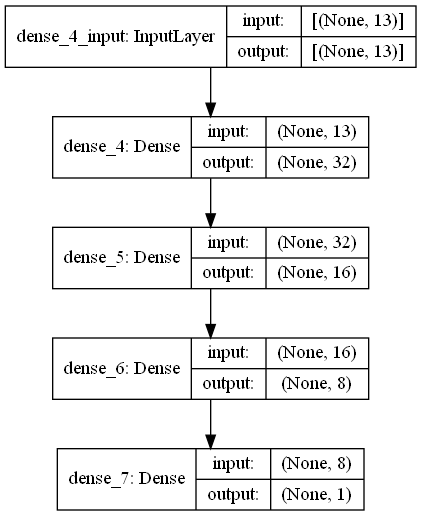

In [108]:
# 모델구조를 그래프로 확인 -> graphviz 가 설치되있어야 한다.
keras.utils.plot_model(model, show_shapes=True, to_file='housing_model.png')  #to_file은 파일경로(절대,상대)를 지정. 생략: model.png

#### 컴파일 
- 모델이 학습 할 때 필요한 설정을 해주는 작업
    - loss
    - optimizer
    - metrics

In [109]:
# 회귀 - loss: mean squared error - "mse"
model.compile(loss='mse', 
              optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE)) #optimizer를 문자열 지정: 기본설정을 사용.

#### 학습(Train)

In [110]:
# batch_size는 train_dataset생성시 batch를 지정했기 때문에 학습시에는 지정하지 않는다.
hist = model.fit(train_dataset, 
                 epochs=N_EPOCHS,
                 validation_data=test_dataset) #Dataset을 이용할 경우 validation_split=비율 는 사용할 수 없다.

Epoch 1/300
12/12 [==============================] - 1s 12ms/step - loss: 592.8709 - val_loss: 619.4831
Epoch 2/300
12/12 [==============================] - 0s 4ms/step - loss: 593.2823 - val_loss: 611.2827
Epoch 3/300
12/12 [==============================] - 0s 5ms/step - loss: 584.1644 - val_loss: 604.6678
Epoch 4/300
12/12 [==============================] - 0s 8ms/step - loss: 575.6312 - val_loss: 596.9319
Epoch 5/300
12/12 [==============================] - 0s 6ms/step - loss: 563.8726 - val_loss: 585.2517
Epoch 6/300
12/12 [==============================] - 0s 4ms/step - loss: 558.0722 - val_loss: 568.1948
Epoch 7/300
12/12 [==============================] - 0s 5ms/step - loss: 535.7719 - val_loss: 544.5541
Epoch 8/300
12/12 [==============================] - 0s 7ms/step - loss: 503.5483 - val_loss: 512.6765
Epoch 9/300
12/12 [==============================] - 0s 7ms/step - loss: 473.6726 - val_loss: 469.5892
Epoch 10/300
12/12 [==============================] - 0s 4ms/step - loss

12/12 [==============================] - 0s 3ms/step - loss: 7.0345 - val_loss: 20.6265
Epoch 162/300
12/12 [==============================] - 0s 5ms/step - loss: 7.2066 - val_loss: 20.9311
Epoch 163/300
12/12 [==============================] - 0s 4ms/step - loss: 7.2230 - val_loss: 20.8154
Epoch 164/300
12/12 [==============================] - 0s 4ms/step - loss: 7.1319 - val_loss: 20.3926
Epoch 165/300
12/12 [==============================] - 0s 4ms/step - loss: 7.2942 - val_loss: 21.3469
Epoch 166/300
12/12 [==============================] - 0s 4ms/step - loss: 7.2296 - val_loss: 20.1810
Epoch 167/300
12/12 [==============================] - 0s 2ms/step - loss: 7.1465 - val_loss: 20.3193
Epoch 168/300
12/12 [==============================] - 0s 4ms/step - loss: 7.0689 - val_loss: 20.7123
Epoch 169/300
12/12 [==============================] - ETA: 0s - loss: 9.003 - 0s 5ms/step - loss: 6.9806 - val_loss: 20.4480
Epoch 170/300
12/12 [==============================] - 0s 4ms/step - los

In [93]:
np.sqrt(17)

4.123105625617661

#### 결과 시각화

In [111]:
import matplotlib.pyplot as plt

In [112]:
print(type(hist.history))
hist.history.keys()

<class 'dict'>


dict_keys(['loss', 'val_loss'])

In [113]:
hist.history['loss']

[592.8709106445312,
 593.2822875976562,
 584.1643676757812,
 575.6312255859375,
 563.87255859375,
 558.0722045898438,
 535.7719116210938,
 503.5483093261719,
 473.6726379394531,
 412.916015625,
 354.6805725097656,
 283.8533935546875,
 208.90513610839844,
 143.6331787109375,
 103.61356353759766,
 90.61896514892578,
 77.21500396728516,
 61.6012077331543,
 52.48503494262695,
 46.70335388183594,
 40.101402282714844,
 33.77028274536133,
 27.577857971191406,
 27.66492462158203,
 23.96141815185547,
 23.394559860229492,
 20.768064498901367,
 21.65313720703125,
 20.010011672973633,
 20.28533363342285,
 19.34895133972168,
 18.63469123840332,
 17.765363693237305,
 17.293527603149414,
 17.116872787475586,
 16.784475326538086,
 16.48845672607422,
 15.666072845458984,
 15.535822868347168,
 15.063124656677246,
 14.686683654785156,
 14.159222602844238,
 13.970169067382812,
 12.870989799499512,
 13.701972007751465,
 12.570427894592285,
 13.281486511230469,
 13.197608947753906,
 12.7517671585083,
 12.70

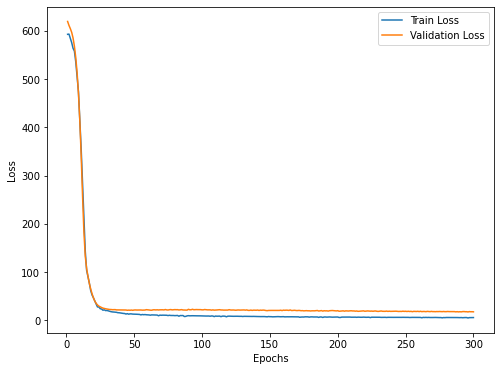

In [114]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

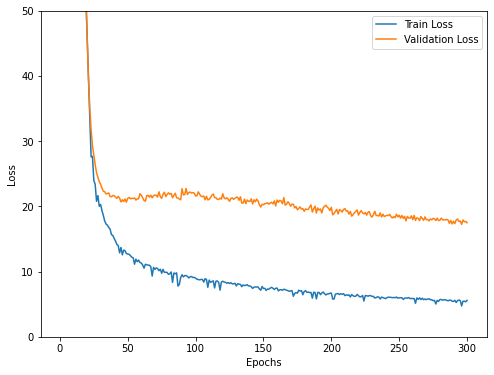

In [115]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')

plt.ylim(0,50)

plt.legend()
plt.show()

#### 최종 테스트

In [118]:
loss = model.evaluate(test_dataset)
print(loss, np.sqrt(loss))

4/4 [==============================] - 0s 3ms/step - loss: 17.4885
17.48847770690918 4.181922728471819


#### 추론

In [119]:
new_data = X_test[:5]
pred = model.predict(new_data)

In [122]:
pred

array([[ 8.359838],
       [19.241558],
       [22.145933],
       [33.964783],
       [24.167013]], dtype=float32)

In [123]:
test_y[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

## 2. Classification

### Fashion MNIST Dataset - 다중분류

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [126]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)


In [127]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### data 로딩

In [129]:
(train_image, train_label), (test_image, test_label) = keras.datasets.fashion_mnist.load_data()

In [131]:
# 데이터 shape
print(train_image.shape,  test_image.shape)
print(train_label.shape, test_label.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [133]:
# class별 데이터 개수
# train
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [134]:
# test
np.unique(test_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [135]:
# validata set 
from sklearn.model_selection import train_test_split
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size=0.2, stratify=train_label, random_state=0)

In [138]:
print(train_image.shape, val_image.shape)
np.unique(train_label, return_counts=True)

(48000, 28, 28) (12000, 28, 28)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800],
       dtype=int64))

In [ ]:
# train_image, val_image, test_image : X
# train_label, val_label, test_label : y

#### 이미지 확인

In [149]:
train_label[0], class_names[train_label[0]]

(6, 'Shirt')

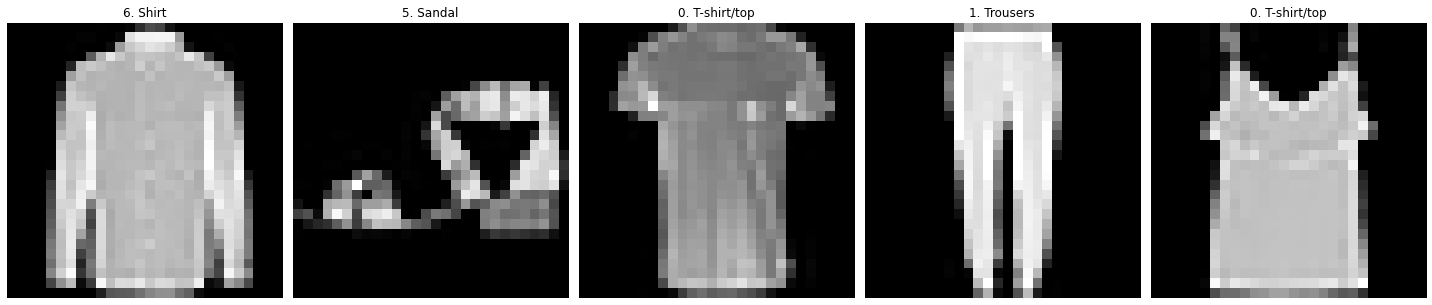

In [147]:
plt.figure(figsize=(20,5))
for i in range(5):
    plt.subplot(1,5, i+1)
    plt.imshow(train_image[i], cmap='gray')
    plt.title(f"{train_label[i]}. {class_names[train_label[i]]}")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수 설정

In [160]:
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 100

N_TRAIN = train_image.shape[0]
N_VAL = val_image.shape[0]
N_TEST = test_image.shape[0]

#### X, y  전처리
- y값 처리
    - 다중 분류에서 label encoding 형식의 label을 one hot encoding 처리

In [151]:
y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 10) (12000, 10) (10000, 10)


In [152]:
y_train[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

- x값(이미지) 처리
    - 이미지데이터 전처리: 0 ~ 1 정규화. X/255.0 => Dataset 생성에서 처리

In [162]:
# X의 타입을 uint8 -> float32 
X_train = train_image.astype(np.float32)
X_val = val_image.astype(np.float32)
X_test = test_image.astype(np.float32)

In [ ]:
# X_train = (train_image/255.0).astype(np.float32)
# X_val = (val_image/255.0).astype(np.float32)
# X_test = (test_image/255.0).astype(np.float32)

#### Dataset 생성
- 데이터입력 파이프라인

In [164]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .map(lambda x, y : (x/255, y))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)

In [166]:
X_train.shape

(48000, 28, 28)

#### 모델 생성 및 컴파일

In [167]:
# 모델 생성 함수
def create_mnist_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=64, activation='relu'))
    # 출력 레이어: 다중분류 - unit개수: class개수, activation함수: softmax
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [168]:
# 모델 생성 및 컴파일
model = create_mnist_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='categorical_crossentropy',  #다중분류 loss: categorical_crossentropy
              metrics=['accuracy']) #분류 : metrics(평가지표)로 accuracy를 추가.

In [169]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


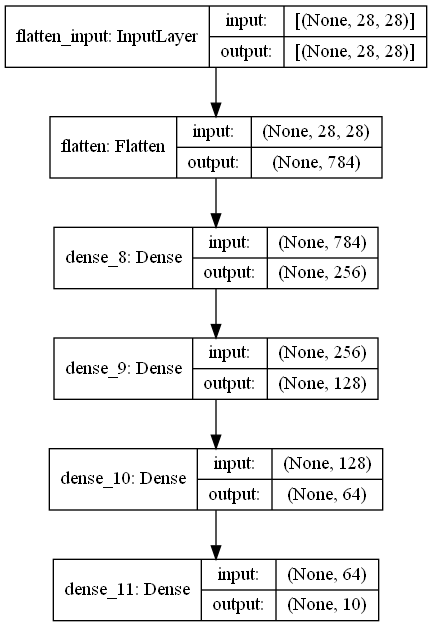

In [170]:
keras.utils.plot_model(model, show_shapes=True, to_file='fashion_mnist_model.png')

#### Train

In [171]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/100
480/480 [==============================] - 5s 8ms/step - loss: 0.5409 - accuracy: 0.8085 - val_loss: 0.4742 - val_accuracy: 0.8279
Epoch 2/100
480/480 [==============================] - 4s 7ms/step - loss: 0.3797 - accuracy: 0.8616 - val_loss: 0.3550 - val_accuracy: 0.8697
Epoch 3/100
480/480 [==============================] - 5s 7ms/step - loss: 0.3367 - accuracy: 0.8773 - val_loss: 0.3430 - val_accuracy: 0.8742
Epoch 4/100
480/480 [==============================] - 5s 7ms/step - loss: 0.3123 - accuracy: 0.8845 - val_loss: 0.3196 - val_accuracy: 0.8820
Epoch 5/100
480/480 [==============================] - 5s 7ms/step - loss: 0.2927 - accuracy: 0.8906 - val_loss: 0.3215 - val_accuracy: 0.8792
Epoch 6/100
480/480 [==============================] - 5s 7ms/step - loss: 0.2767 - accuracy: 0.8961 - val_loss: 0.3234 - val_accuracy: 0.8813
Epoch 7/100
480/480 [==============================] - 4s 7ms/step - loss: 0.2670 - accuracy: 0.9012 - val_loss: 0.3047 - val_accuracy: 0.8887

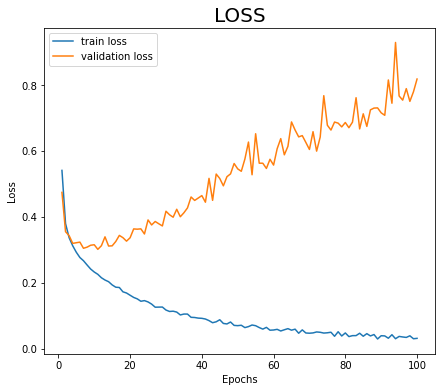

In [174]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

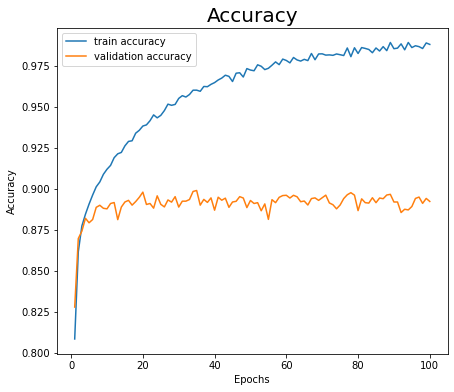

In [175]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 최종평가

In [177]:
loss, accuracy = model.evaluate(test_dataset)

100/100 [==============================] - 1s 5ms/step - loss: 0.9263 - accuracy: 0.8910


In [178]:
print(loss, accuracy)

0.9263355731964111 0.890999972820282


#### 새로운 데이터 추론

In [180]:
new_input = X_test[:5]
new_input = new_input/255 #정규화

In [181]:
pred = model.predict(new_input)

In [184]:
pred_class = np.argmax(pred, axis=-1)
pred_class

array([9, 2, 1, 1, 6], dtype=int64)

In [191]:
test_label[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [190]:
class_names = np.array(class_names)
class_names[pred_class]

array(['Ankle boot', 'Pullover', 'Trousers', 'Trousers', 'Shirt'],
      dtype='<U11')

### 위스콘신 유방암 데이터셋 - 이진분류 문제
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

#### data loading and split

In [4]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [5]:
# Test set분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
# Train/Val set 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

In [6]:
X_train[:3]

array([[1.955e+01, 2.321e+01, 1.289e+02, 1.174e+03, 1.010e-01, 1.318e-01,
        1.856e-01, 1.021e-01, 1.989e-01, 5.884e-02, 6.107e-01, 2.836e+00,
        5.383e+00, 7.010e+01, 1.124e-02, 4.097e-02, 7.469e-02, 3.441e-02,
        2.768e-02, 6.240e-03, 2.082e+01, 3.044e+01, 1.420e+02, 1.313e+03,
        1.251e-01, 2.414e-01, 3.829e-01, 1.825e-01, 2.576e-01, 7.602e-02],
       [1.378e+01, 1.579e+01, 8.837e+01, 5.859e+02, 8.817e-02, 6.718e-02,
        1.055e-02, 9.937e-03, 1.405e-01, 5.848e-02, 3.563e-01, 4.833e-01,
        2.235e+00, 2.934e+01, 6.432e-03, 1.156e-02, 7.741e-03, 5.657e-03,
        1.227e-02, 2.564e-03, 1.527e+01, 1.750e+01, 9.790e+01, 7.066e+02,
        1.072e-01, 1.071e-01, 3.517e-02, 3.312e-02, 1.859e-01, 6.810e-02],
       [1.865e+01, 1.760e+01, 1.237e+02, 1.076e+03, 1.099e-01, 1.686e-01,
        1.974e-01, 1.009e-01, 1.907e-01, 6.049e-02, 6.289e-01, 6.633e-01,
        4.293e+00, 7.156e+01, 6.294e-03, 3.994e-02, 5.554e-02, 1.695e-02,
        2.428e-02, 3.535e-03, 2.282e

In [9]:
y_train[:3]

array([0, 1, 0])

#### 하이퍼파라미터, 변수 정의

In [12]:
LEARNING_RATE = 0.001
N_EPOCHS = 150
N_BATCHS = 50

#각 데이터셋의 데이터 개수
N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

#### 데이터 전처리
- 이진 분류
    - 출력 레이어의 unit을 1개, activation 함수를 sigmoid를 사용하는 경우(1일 확률) => y:그대로 사용
    - 출력 레이어의 unit을 2개, activation 함수를 sofmax를 사용하는 경우(0일 확률, 1일 확률) - 다중분류와 동일하게 구현 => y: one hot encoding
- X: 테이블데이터
    - 문자열(범주형): one hot encoding
    - 연속형(수치형): feature scaling

In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Dataset 생성

In [23]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [24]:
X_train.shape

(364, 30)

#### model 생성, 컴파일

In [25]:
def create_cancer_model():
    model = keras.Sequential()
    model.add(layers.Dense(units=32, activation='relu', input_shape=(30, )))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    #출력: 1일확률 - unit:1, activation: sigmoid  (0확률, 0확률-unit-2, activation: softmax)
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    return model

In [26]:
model = create_cancer_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy', # 1일확률: binary_crossentropy,  (0확률,1확률): categorical_crossentropy
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 9         
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


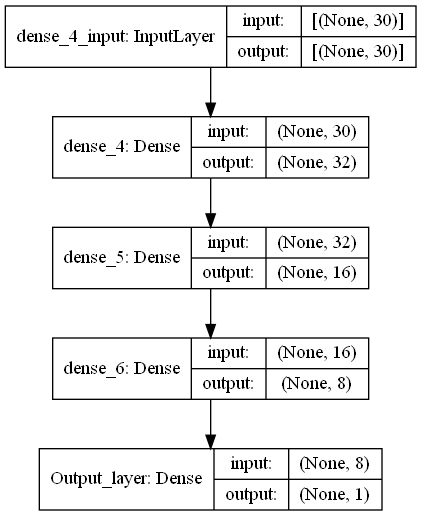

In [21]:
keras.utils.plot_model(model, show_shapes=True, to_file='cancer_model.png')

#### Train(학습)

In [28]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/150
7/7 [==============================] - 1s 41ms/step - loss: 0.5845 - accuracy: 0.7314 - val_loss: 0.5223 - val_accuracy: 0.7802
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.4585 - accuracy: 0.8571 - val_loss: 0.4239 - val_accuracy: 0.8791
Epoch 3/150
7/7 [==============================] - 0s 10ms/step - loss: 0.3747 - accuracy: 0.9000 - val_loss: 0.3525 - val_accuracy: 0.9011
Epoch 4/150
7/7 [==============================] - 0s 6ms/step - loss: 0.3115 - accuracy: 0.9314 - val_loss: 0.2948 - val_accuracy: 0.9121
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 0.2626 - accuracy: 0.9457 - val_loss: 0.2476 - val_accuracy: 0.9451
Epoch 6/150
7/7 [==============================] - 0s 9ms/step - loss: 0.2205 - accuracy: 0.9457 - val_loss: 0.2111 - val_accuracy: 0.9451
Epoch 7/150
7/7 [==============================] - 0s 10ms/step - loss: 0.1862 - accuracy: 0.9571 - val_loss: 0.1821 - val_accuracy: 0.9670
Epoch 8/150
7/7 [=======

7/7 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 0.9971 - val_loss: 0.0291 - val_accuracy: 0.9890
Epoch 60/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9890
Epoch 61/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0119 - accuracy: 0.9971 - val_loss: 0.0283 - val_accuracy: 0.9890
Epoch 62/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.0279 - val_accuracy: 0.9890
Epoch 63/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.0272 - val_accuracy: 0.9890
Epoch 64/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.9971 - val_loss: 0.0270 - val_accuracy: 0.9890
Epoch 65/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0269 - val_accuracy: 0.9890
Epoch 66/150
7/7 [==============

7/7 [==============================] - 0s 5ms/step - loss: 8.3548e-04 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 118/150
7/7 [==============================] - 0s 5ms/step - loss: 9.6452e-04 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 119/150
7/7 [==============================] - 0s 5ms/step - loss: 8.1943e-04 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 120/150
7/7 [==============================] - 0s 7ms/step - loss: 9.1844e-04 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 121/150
7/7 [==============================] - 0s 9ms/step - loss: 8.9175e-04 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 122/150
7/7 [==============================] - 0s 6ms/step - loss: 9.0546e-04 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 123/150
7/7 [==============================] - 0s 6ms/step - loss: 8.4892e-04 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000

#### 결과 plotting

In [29]:
# loss
import matplotlib.pyplot as plt

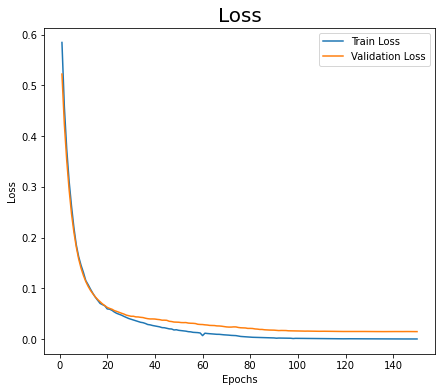

In [30]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

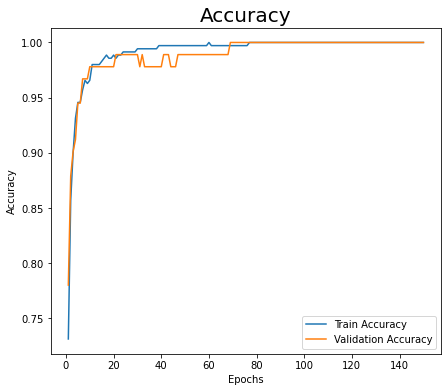

In [31]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 최종평가

In [32]:
loss, acc = model.evaluate(test_dataset)

3/3 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9649


In [33]:
print(loss, acc)

0.20245976746082306 0.9649122953414917


#### 새로운 데이터 추론

In [35]:
new_data = X_test[:5]
new_data_scaled = scaler.transform(new_data) # 전처리

In [36]:
pred = model.predict(new_data_scaled)

In [37]:
pred

array([[2.2280736e-05],
       [1.4693959e-19],
       [4.8656590e-09],
       [9.9999958e-01],
       [4.2908283e-08]], dtype=float32)

In [39]:
result = (pred > 0.5).astype(np.int8) #True:1, False: 0
result

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int8)

In [40]:
result_label = np.where(pred>=0.5, "양성", "악성") #0: 악성, 1: 양성
result_label

array([['악성'],
       ['악성'],
       ['악성'],
       ['양성'],
       ['악성']], dtype='<U2')

In [42]:
result2 = model.predict_classes(new_data_scaled)
result2

C:\Users\Playdata\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [1],
       [0]])

### Tensorflow 2.3이하 버전에서 Train dataset 구성 및 학습 
- 위의 코드들은 2.4 이후 버전
1. train_dataset 구성시 repeat를 추가
2. 학습시에 train/validation step 횟수를 추가

In [43]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()

#validation/test는 동일
val_dataset2 = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)
test_dataset2 = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [44]:
# 학습시 train/validation 스텝 횟수 계산
steps_per_epoch = N_TRAIN // N_BATCHS # TRAIN 시 1 에폭당 STEP 횟수: TRAIN데이터개수 // BATCH_SIZE (drop_remainder=True)
validation_steps = int(np.ceil(N_VAL / N_BATCHS))                  # 한 에폭에서 validation step수. ceil(VAL데이터수/BATCH_SIZE) - drop_remainder=False
print(steps_per_epoch, validation_steps)

7 2


In [48]:
model.fit(train_dataset2, 
          steps_per_epoch=steps_per_epoch,
          validation_data=val_dataset2,
          validation_steps=validation_steps, 
          epochs=2)

Epoch 1/2
7/7 [==============================] - 0s 4ms/step - loss: 4.4479e-04 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 2/2
7/7 [==============================] - 0s 4ms/step - loss: 4.3774e-04 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000


In [49]:
model.fit?